<a href="https://colab.research.google.com/github/khchoi-physik/pbh_simulations/blob/main/curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp

import os
import glob

In [46]:
# @title Fitting distributions


def gumbel(x,mu,beta):
    z  = (x-mu)/beta
    return beta**(-1) * np.exp( -( z+ np.exp(-z) ) )


def frechet(x,a,s,m):

    return (a/s) * ( (x-m) / s)**(-1-a) * np.exp(- ( (x-m) / s)**(-a) )


def weibull(x,lam,k):

    return (k/lam)*(x/lam)**(k-1) * np.exp(-(x/lam)**k)


def gev(x,u,sigma,zeta):

    z = (x-u)/sigma

    if zeta == 0:
        t = np.exp(-z)
    else:
        t = (1+zeta*z) **(-1/zeta)

    return (1/sigma) * (t**(zeta+1)) * np.exp(-t)



def gamma_dist(x,alpha,beta):

    gamma_pdf = ( (beta**alpha) / gamma(alpha) ) * (x**(alpha-1) ) * np.exp(- beta * x)

    return gamma_pdf


In [47]:
# @title Load gdrive

from google.colab import drive
drive.mount('/content/gdrive')

main_path = '/content/gdrive/MyDrive/2023 RFSimulations/simulated_results'
folder_path = main_path + '/block_maxima_data'
gumbel_path = folder_path +'/gumbel'
frechet_path = folder_path +'/frechet'
os.chdir(folder_path)
print(os.getcwd())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/2023 RFSimulations/simulated_results/block_maxima_data


In [48]:
# @title Presets

box_sizes = [5,9,10,16,32]
xmin =0
xmax = 35
bins_sizes = 501
xrange = np.linspace(xmin,xmax,bins_sizes)
colors = ['red', 'blue', 'green', 'black', 'yellow', 'purple', 'orange']

In [ ]:
# @title Gumbel


for l in box_sizes:
    npy_list = glob.glob(f'max_ampligude_l_{l}*.npy')
    print(npy_list)


    fig1, ax1 = plt.subplots(figsize= (12,6))
    fig2, ax2 = plt.subplots(figsize= (12,6))
    fig3, ax3 = plt.subplots(figsize= (12,6))



    for i,npy_file in enumerate(npy_list):
        data = np.load(f'{npy_file}')

        hists, bins = np.histogram(data, density =True, bins= bins_sizes)
        params  = sp.optimize.curve_fit(gumbel, bins[1:], hists)



        ax1.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=npy_file)
        ax2.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Data {npy_file}')#

        ax3.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=f'Data {npy_file}')
        ax3.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Fit {npy_file}', linestyle=':')#


        fig4, ax4 = plt.subplots(figsize= (12,6))
        ax4.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=f'Data {npy_file}')
        ax4.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Fit {npy_file}', linestyle=':')#
        ax4.legend(fontsize= 12)
        ax4.tick_params(axis='both', which='major', labelsize= 12)
        ax4.set_xlabel('Amplitude', fontsize= 18)
        ax4.set_ylabel('Probability density', fontsize= 18)
        ax4.set_title(f'{npy_file}', fontsize= 18)
        ax4.set_xlim(xmin,xmax)

        fig4.savefig(f'Fitted_gumbel_{npy_file}.png')

    ax1.legend(fontsize= 12)
    ax2.legend(fontsize= 12)
    ax3.legend(fontsize= 12)

    ax1.set_title('Data', fontsize= 18)
    ax2.set_title('Fitted gumbel', fontsize= 18)
    ax3.set_title('Data+Fitted gumbel', fontsize= 18)

    ax1.set_xlabel('Amplitude', fontsize= 18)
    ax2.set_xlabel('Amplitude', fontsize= 18)
    ax3.set_xlabel('Amplitude', fontsize= 18)

    ax1.set_ylabel('Probability density', fontsize= 18)
    ax2.set_ylabel('Probability density', fontsize= 18)
    ax3.set_ylabel('Probability density', fontsize= 18)

    ax1.tick_params(axis='both', which='major', labelsize= 12)
    ax2.tick_params(axis='both', which='major', labelsize= 12)
    ax3.tick_params(axis='both', which='major', labelsize= 12)

    ax1.set_xlim(xmin,xmax)
    ax2.set_xlim(xmin,xmax)
    ax3.set_xlim(xmin,xmax)

    fig1.savefig(f'Data_l_{l}.png')
    fig2.savefig(f'Fitted_gumbel_l_{l}.png')
    fig3.savefig(f'Data_Fitted_gumbel_l_{l}.png')
    plt.tight_layout()
    plt.close('all')

['max_ampligude_l_5_k_2.npy', 'max_ampligude_l_5_k_3.npy', 'max_ampligude_l_5_k_0.npy', 'max_ampligude_l_5_k_1.npy']
['max_ampligude_l_9_k_2.npy', 'max_ampligude_l_9_k_3.npy', 'max_ampligude_l_9_k_0.npy', 'max_ampligude_l_9_k_1.npy']
['max_ampligude_l_10_k_0.npy', 'max_ampligude_l_10_k_1.npy', 'max_ampligude_l_10_k_2.npy', 'max_ampligude_l_10_k_3.npy']
['max_ampligude_l_16_k_3.npy', 'max_ampligude_l_16_k_2.npy', 'max_ampligude_l_16_k_1.npy', 'max_ampligude_l_16_k_0.npy']
['max_ampligude_l_32_k_1.npy', 'max_ampligude_l_32_k_0.npy', 'max_ampligude_l_32_k_3.npy', 'max_ampligude_l_32_k_2.npy']


In [ ]:
# @title Gumbel with different spectral index

k_power_list = [0,1,2,3]

def sort_key(filename):
    # Split by underscores and take the part after 'l_'
    return int(filename.split('_')[3])

for k_power in k_power_list:
    npy_list_unordered = glob.glob(f'max_ampligude_*_k_{k_power}*.npy')
    npy_list = sorted(npy_list_unordered, key= sort_key )

    print(npy_list)

    fig1, ax1 = plt.subplots(figsize= (12,6))
    fig2, ax2 = plt.subplots(figsize= (12,6))
    fig3, ax3 = plt.subplots(figsize= (12,6))


    for i,npy_file in enumerate(npy_list):
        data = np.load(f'{npy_file}')

        hists, bins = np.histogram(data, density =True, bins= bins_sizes)
        params  = sp.optimize.curve_fit(gumbel, bins[1:], hists)


        ax1.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=npy_file)
        ax2.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Data {npy_file}')#

        ax3.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=f'Data {npy_file}')
        ax3.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Fit {npy_file}', linestyle=':')#


        fig4, ax4 = plt.subplots(figsize= (12,6))
        ax4.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=f'Data {npy_file}')
        ax4.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Fit {npy_file}', linestyle=':')#
        ax4.legend(fontsize= 12)
        ax4.tick_params(axis='both', which='major', labelsize= 12)
        ax4.set_xlabel('Amplitude', fontsize= 18)
        ax4.set_ylabel('Probability density', fontsize= 18)
        ax4.set_title(f'{npy_file}', fontsize= 18)
        ax4.set_xlim(xmin,xmax)

        fig4.savefig(f'Fitted_gumbel_{npy_file}.png')

    ax1.legend(fontsize= 12)
    ax2.legend(fontsize= 12)
    ax3.legend(fontsize= 12)

    ax1.set_title('Data', fontsize= 18)
    ax2.set_title('Fitted gumbel', fontsize= 18)
    ax3.set_title('Data+Fitted gumbel', fontsize= 18)

    ax1.set_xlabel('Amplitude', fontsize= 18)
    ax2.set_xlabel('Amplitude', fontsize= 18)
    ax3.set_xlabel('Amplitude', fontsize= 18)

    ax1.set_ylabel('Probability density', fontsize= 18)
    ax2.set_ylabel('Probability density', fontsize= 18)
    ax3.set_ylabel('Probability density', fontsize= 18)

    ax1.tick_params(axis='both', which='major', labelsize= 12)
    ax2.tick_params(axis='both', which='major', labelsize= 12)
    ax3.tick_params(axis='both', which='major', labelsize= 12)

    ax1.set_xlim(xmin,xmax)
    ax2.set_xlim(xmin,xmax)
    ax3.set_xlim(xmin,xmax)

    fig1.savefig(f'Data_k_{k_power}.png')
    fig2.savefig(f'Fitted_gumbel_k_{k_power}.png')
    fig3.savefig(f'Data_Fitted_gumbel_k_{k_power}.png')
    plt.tight_layout()
    plt.close('all')

['max_ampligude_l_5_k_0.npy', 'max_ampligude_l_9_k_0.npy', 'max_ampligude_l_10_k_0.npy', 'max_ampligude_l_16_k_0.npy', 'max_ampligude_l_32_k_0.npy', 'max_ampligude_l_48_k_0.npy']
['max_ampligude_l_3_k_1.npy', 'max_ampligude_l_4_k_1.npy', 'max_ampligude_l_5_k_1.npy', 'max_ampligude_l_9_k_1.npy', 'max_ampligude_l_10_k_1.npy', 'max_ampligude_l_16_k_1.npy', 'max_ampligude_l_32_k_1.npy', 'max_ampligude_l_48_k_1.npy']
['max_ampligude_l_4_k_2.npy', 'max_ampligude_l_5_k_2.npy', 'max_ampligude_l_6_k_2.npy', 'max_ampligude_l_7_k_2.npy', 'max_ampligude_l_8_k_2.npy', 'max_ampligude_l_9_k_2.npy', 'max_ampligude_l_10_k_2.npy', 'max_ampligude_l_16_k_2.npy', 'max_ampligude_l_32_k_2.npy']
['max_ampligude_l_5_k_3.npy', 'max_ampligude_l_9_k_3.npy', 'max_ampligude_l_10_k_3.npy', 'max_ampligude_l_16_k_3.npy', 'max_ampligude_l_32_k_3.npy', 'max_ampligude_l_48_k_3.npy']


[]


<ipython-input-46-4b6a37b3c568>:16: RuntimeWarning: invalid value encountered in power
  return (k/lam)*(x/lam)**(k-1) * np.exp(-(x/lam)**k)


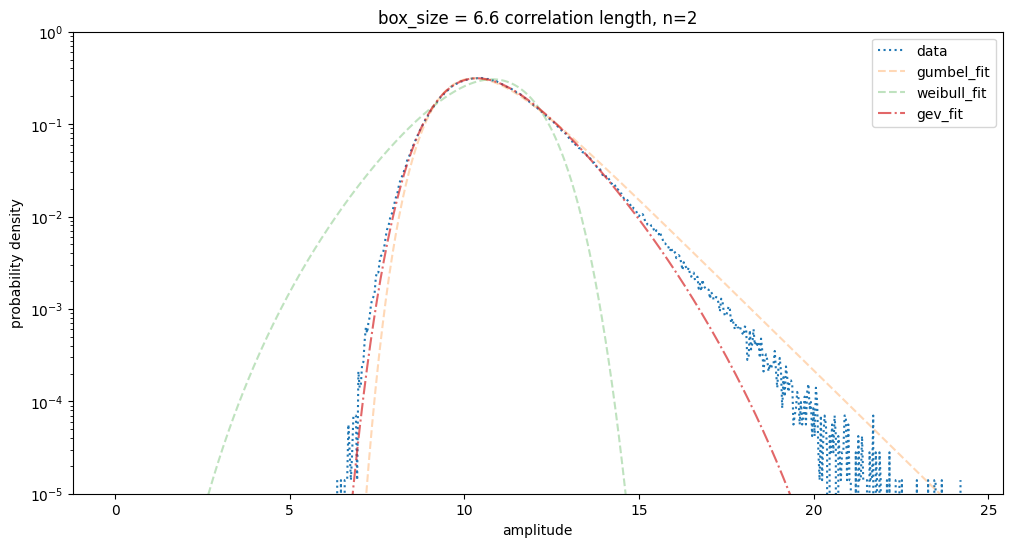

In [143]:
 # @title Other EVD Fitting ( Weibull & Frechet)

l = 16
k_power = 2

npy_list = glob.glob(f'max_ampligude_l_{l}*.npy')
print(npy_list)


os.chdir(folder_path)
#data = np.load(f'max_ampligude_l_16_k_3.npy')

data = np.load(f'max_ampligude_l_{l}_k_{k_power}.npy')
os.chdir(frechet_path)

hists, bins = np.histogram(data, density =True, bins= bins_sizes)
# params_frechet = sp.optimize.curve_fit(frechet, bins[1:], hists , p0=[4,7,2]) # fit frechet
params_gumbel  = sp.optimize.curve_fit(gumbel, bins[1:], hists) # fit gumbel
params_weibull = sp.optimize.curve_fit(weibull, bins[1:], hists) # fit weibull
params_gev = sp.optimize.curve_fit(gev, bins[1:], hists, p0=[10.25 , 2 , -0.1]) # fit gev

xrange = np.linspace(0,bins[1:].max(), bins[1:].shape[0]) # define xrange by bin size and bin location

plt.figure(figsize=(12,6) )
plt.plot(bins[1:],hists, label='data', alpha=1, linestyle = 'dotted') # plot data

# plt.plot(xrange, frechet(xrange, *params_frechet[0]), label= 'frechet_fit', alpha=0.3, linestyle = 'dashed') # plot frechet
plt.plot(xrange, gumbel(xrange, *params_gumbel[0]), label= 'gumbel_fit', alpha=0.3, linestyle = 'dashed') # plot gumbel
plt.plot(xrange, weibull(xrange, *params_weibull[0]), label= 'weibull_fit', alpha=0.3, linestyle = 'dashed') # plot weibull
plt.plot(xrange, gev(xrange, *params_gev[0]), label= 'gev_fit', alpha=0.7, linestyle = 'dashdot') # plot weibull
plt.xlabel('amplitude')
plt.ylabel('probability density')
plt.yscale('log')
plt.ylim(1e-5,1)
plt.title(f'box_size = {(2*l+1)/5} correlation length, n={k_power}')

plt.legend()

plt.savefig(f'Fitted_data_l_{2*l+1}_k_{k_power}.pdf')

In [130]:
print(f'\nGEV: \n u, sigma, zeta = \n', params_gev[0])
print(f'cov. = \n', params_gev[1])

print(f'\nGUMBEL: \nmu, beta = \n', params_gumbel[0])
print(f'cov. = \n', params_gumbel[1])

print(f'\nWEIBULL: \nlam, k = \n', params_weibull[0])
print(f'cov. = \n', params_weibull[1])

# print(f'\nFRECHET: \na, s, m = \n', [-9.24038403, -18.96317549,  25.49588096])

print(f'\nFRECHET: \na, s, m = \n', params_frechet)



GEV: 
 u, sigma, zeta = 
 [10.25721388  1.17768922 -0.08423038]
cov. = 
 [[ 1.55877388e-06 -6.61522656e-10  6.52539381e-07]
 [-6.61522656e-10  8.85550751e-07 -2.36313802e-07]
 [ 6.52539381e-07 -2.36313802e-07  1.87977765e-06]]

GUMBEL: 
mu, beta = 
 [10.28734713  1.17321786]
cov. = 
 [[1.02479460e-05 1.62558635e-06]
 [1.62558635e-06 7.07893750e-06]]

WEIBULL: 
lam, k = 
 [10.94590361  9.03834154]
cov. = 
 [[0.00024248 0.00022206]
 [0.00022206 0.00904024]]

FRECHET: 
a, s, m = 
 (array([ 13675.73196321,  16945.50125457, -16936.99052355]), array([[ 3.58181184e+10,  4.43508779e+10, -4.43508775e+10],
       [ 4.43508779e+10,  5.49163532e+10, -5.49163527e+10],
       [-4.43508775e+10, -5.49163527e+10,  5.49163523e+10]]))


<ipython-input-2-8d13deeaf5e7>:25: RuntimeWarning: invalid value encountered in power
  t = (1+zeta*z) **(-1/zeta)


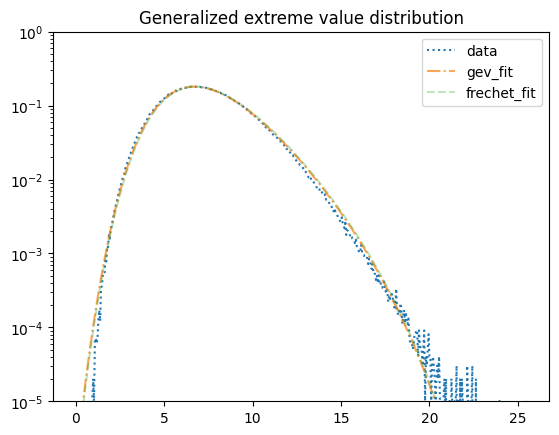

In [ ]:
params_gev = sp.optimize.curve_fit(gev, bins[1:], hists, p0=[7 , 2 , 0.2]) # fit gev

plt.plot(bins[1:],hists, label='data', alpha=1, linestyle = 'dotted') # plot data
plt.plot(xrange, gev(xrange, *params_gev[0]), label= 'gev_fit', alpha=0.7, linestyle = 'dashdot') # plot weibull
plt.plot(xrange, frechet(xrange, -9.24038403, -18.96317549,  25.49588096), label= 'frechet_fit', alpha=0.3, linestyle = 'dashed') # plot frechet
plt.title('Generalized extreme value distribution')
plt.yscale('log')
plt.ylim(1e-5,1)
plt.legend()

In [ ]:
print(params_gev)

(array([ 6.47694229,  2.04671884, -0.10761464]), array([[ 1.22696809e-05, -4.59072799e-07,  2.88451092e-06],
       [-4.59072799e-07,  6.98507407e-06, -1.32187736e-06],
       [ 2.88451092e-06, -1.32187736e-06,  4.69068683e-06]]))


In [ ]:
print(params_gev[0])

[ 6.47694229  2.04671884 -0.10761464]


In [ ]:
# [ 6.45157183  1.99777239 -0.10490122]